### <p style="text-align: right;"> &#9989; Foster Krause.</p>

# Homework Assignment #4 (Individual)
## Graph theory and Regression models


### Goal for this homework assignment
By now, you have learned graph theory and regression models, respectively. Let us use what you learned to do some data science analyses. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, April 2.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 1: Add to your Git repository to track your progress on your assignment (5 points)

As usual, for this assignment, you're going to add it to the `cmse202-s21-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s21-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s21-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
# git clone https://github.com/KrauseFo/cmse202-s21-turnin
```

---
## Part 2: Graph theory

Execute the cell below to load python necessary packages.

In [36]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

from IPython.display import display, clear_output
import time


---
## Part 2.1: Scale-free networks in social science (22 points)

&#9989;  **Question 2.1 (5 points)** You are provided with a file of adjacency matrix for a social network (**'adj.txt'**), where the nodes are individuals and edges represent email communications. Thus, if a pair of nodes are connected with each other, that means the two individuals may know each other and used to exchange emails. 

Let's first construct the network (graph). The adjacency matrix, which tells us which nodes are connected with each other, is provided in the file 'adj.txt'. 

Load the data from 'adj.txt' using Pandas, and then construct the graph using Networkx. 

Visualize the graph after it's constructed, with node labels (0-based node IDs) shown on the graph. 

**Note**: A file **'position.txt'** is provided to allocate the x- and y-coordinates of nodes in the visualization, simply to make the graph looks better even though we don't care about the physical coordinates of individuals in this social network. Make sure to use the 'pos' parameter when you draw the network.

If you're successful in getting everything loaded up and you visualize the graph, you should get something that looks like this:

<img src="https://i.ibb.co/TP0Sw1r/social-network.png" alt="social-network" border="0">

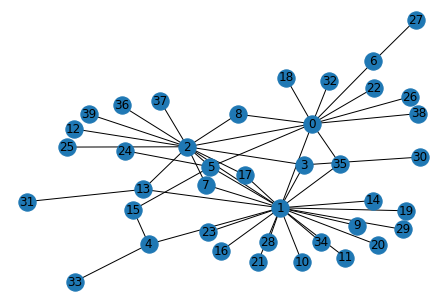

In [2]:
# Put your code here:
adjacency_matrix = pd.read_csv('adj.txt',header=None)
graph = nx.Graph(adjacency_matrix)
nx.draw(graph, with_labels=True)

&#9989;  **Question 2.2 (3 points)** In the constructed network, you may notice some nodes have many more neighbors than other nodes, i.e. some nodes have more edges than other nodes. The number of edges connected to a specific node is called the **degree** of that node. A graph object created by Networkx has attributes for degrees of all nodes. 

Use networkx to get the degrees for all the nodes in the graph, and then plot a histogram to show the distribution of degrees. You may want to print out the degree information to see if your resulting histogram makes sense!

(array([27.,  6.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <BarContainer object of 20 artists>)

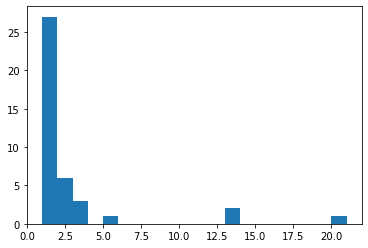

In [3]:
# Put your code here:
degrees = graph.degree()
len(degrees)
degree_list = []
for i in range(len(degrees)):
    degree_list.append(degrees[i])
    
plt.hist(degree_list, bins=20)

In [4]:
degrees

DegreeView({0: 13, 1: 21, 2: 13, 3: 3, 4: 3, 5: 5, 6: 2, 7: 2, 8: 2, 9: 1, 10: 1, 11: 1, 12: 1, 13: 3, 14: 1, 15: 2, 16: 1, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 2, 36: 1, 37: 1, 38: 1, 39: 1})

&#9989;  **Question 2.3 (1 point)** Describe the distribution of degrees. What is the main range of degree values for most of the nodes? And are there any outliers?

<font size=+3>&#9998;</font> Your answer here: 
most of the nodes have have between 1 and 3 degrees, there are a few outliars at the 13-15 degrees and one at 20 degrees

&#9989;  **Question 2.4 (5 points)** Visualize the network again (with labels shown), but with different colors for the nodes. 

If a node has a degree > 10, color the node as `red`.  Otherwise, color the node as `gray`. You should be able to confirm that you colored the correct nodes by looking at the degree information from previously. Networkx can take a list of strings for node colors into the `node_color` argument in the `draw()` function.

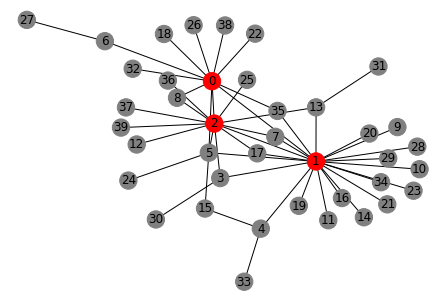

In [5]:
# Put your code here:
colors = []
for i in range(len(degrees)):
    if degrees[i] > 10:
        colors.append('red')
    else:
        colors.append('gray')
nx.draw(graph,with_labels=True,node_color = colors)

A network showing a power-law degree distribution is called "scale-free" (https://en.wikipedia.org/wiki/Scale-free_network), which is widely seen in different disciplines including social science, biology and many others. In scale-free networks, there are usually a few 'network hubs' connecting to many neighbors in the graph. 

&#9989;  **Question 2.5 (2 points)** In many cases, we are curious about what is the shortest path from one node (source) to another node (target). Networkx has provided a convenient function to do that. You might need to search the documentation or do a bit of Googling to figure out what this function is called.

Find the shortest path from node 11 to node 10 (0-based node index).  

Which node (nodes) do you need to visit in between? 

How many steps do you need to take to go from node 11 to node 10? (The number of steps is defined as the distance between node 11 to node 10, or the length of the shortest path.)

Make sure to print/display the path you find.

In [6]:
# Put your code here:
print('The shortest path length is' , nx.shortest_path_length(graph,11,10))
print('The path taken is',nx.shortest_path(graph,11,10))

The shortest path length is 2
The path taken is [11, 1, 10]


&#9989;  **Question 2.6 (6 points)** Find the shortest path length (there's a function for this too!) for the shortest path for all pairs of nodes in the graph. Store the lengths of all of the shortest paths in a list.

Once you have you list, plot a histogram to show the distribution of the lengths of shortest paths.

(array([ 40.,   0.,  98.,   0., 636.,   0., 708.,   0., 112.,   6.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

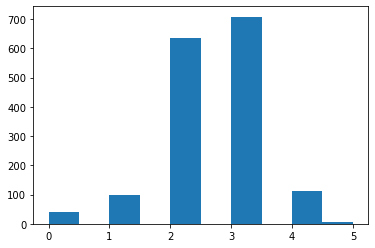

In [7]:
# Put your answer here:
shortest_path = dict(nx.all_pairs_shortest_path_length(graph))
paths = []
for i in range(len(shortest_path)):
    for j in range(len(shortest_path[0])):
        paths.append(shortest_path[i][j])
plt.hist(paths)

**Notes**: From the histogram, you may notice that the maximum length of shortest paths in this graph is small, although there are 40 nodes in the graph. This means that, from a specific node, we can reach any other nodes quickly, due to the existence of 'network hubs'. This is a general property of scale-free networks, which is related to the concept of '**small-world networks**' (https://en.wikipedia.org/wiki/Small-world_network). 

---
## Part 2.2: Information propagation across the graph: borrow information from neighbors (17 points)

In many applications, we want to simulate the dynamics based on the graph topology, i.e. how do neighbors in the network communicate information with each other. For example, if a couple of individuals in the social network happen to know a rumor first and then the rumor starts to be spread to others by emails, how quickly will the rumor spread to everyone? And which groups of individuals will know the rumor early?

Below are the simplified assumptions for the simulation:

1. Three individuals know the rumor first. They are node 15, node 22, and node 27 (0-based node index). Therefore, these 3 nodes are considered as the 'seed' of rumor in the graph.
An 'rumor value' array can be created to label the nodes. For example, the 3 seed nodes are labeled as '1' at the beginning ('1' means they know the rumor for sure 100%), and all other nodes are labeled as '0' at the beginning ('0' means they are totally unaware of the rumor).

2. You write a for loop to do the simulation, where each step in the loop represent a specific time point.

3. At each time point, the rumor value for every node is updated, based on the rumor values of their neighbors in the graph, because if many neighbors know the rumor it is very likely the individual will be informed.

4. Each node will notify its neighbors with a probability that is inversely proportional to its degree. The more neighbors, the less likely that the node will send the rumor to one of its neighbors.

5. For example, if node A has two neighbors: B and C. Node B has a degree of 3 and node C has a degree of 5. Then the rumor value of node A for the next iteration should be updated as: new_value(A) = value(B)/3 +value(C)/5

6. In each iteration of your simulation, you scan all nodes and update the values of rumor labels. 

**Note** you may need to use copy() to avoid the confusion between previous values and newly updated values.


&#9989;  **Question 2.7 (10 points)** Below we provide most of the functions. Using the information above, you need to fill in the gaps where indicated in the cell below.

In [8]:
x = 2
x += 2
x

4

In [9]:
# Complete the code below:

def get_neighbor(G, node):
    ''' 
    get the neighbors for a given node
    '''
    return list(G.neighbors(node))


def update_value(G, prev_value):
    ''' 
    update the rumor values for all nodes, in one iteration 
    G: the graph
    prev_value: the rumor values of every node from previous iteration
    '''
    
    # Put your code here to make a new copy of prev_value;
    # Name the new copy as "next_value"
    next_value = prev_value
    
    # Put your code here to get the degrees of every node;
    degrees = G.degree()
    
    
    
    # Put your code in the for loop to calculate next_value, based on prev_value from neighbors;
    # Note that you can use the "get_neighbor" function above to get the neighbors for a given node
    # You'll need to use the neighbor degree information as indicated in bullet point #5 above
    
    for node in G:
        update_value = 0
        for i in get_neighbor(G,node):
            update_value += prev_value[i]/degrees[i]
        
        next_value[node] = update_value
        
    
    
    
    return next_value



def value2color(values):
    '''
    Convert rumor values to color
    '''
    # white to red
    node_colors = []
    for val in values:
        node_colors.append((1, (1-val)**2, (1-val)**2))
    return node_colors


def draw_iter(G, values, iterations):
    '''
    Simulate the system for certain iterations
    G: the graph
    values: the initial romor values for all nodes
    iterations: the maximum number of iterations for the simulation
    '''
    for i in range(iterations):
        fig = plt.figure()
        
        # Put your code here to update the rumor values and update node colors;
        # Remember that you have functions for these!
        values = update_value(G, values)
        node_colors = value2color(values)
        
        nx.draw(G, with_labels=True, node_color=node_colors)
        plt.title('Iteration ' + str(i+1))
        fig.show()
        
        time.sleep(0.1)
        clear_output(wait=True)
        display(fig)
        fig.clear()       


After you complete the functions above, you can run the cell below to initialize the rumor values for all nodes and visualize the initial graph before simulation. You should get a starting graph that looks like this:

<img src="https://i.ibb.co/WFNW9Vj/rumor-start.png" alt="rumor-start" border="0">

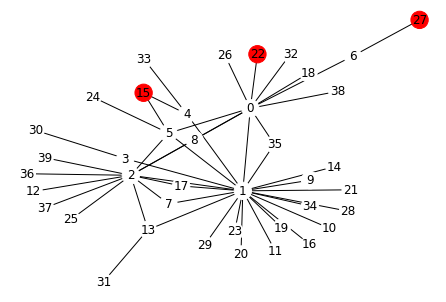

In [10]:
G = graph
values = [0]*len(G)
values[27] = 1
values[15] = 1
values[22] = 1

node_colors = value2color(values)
nx.draw(G, with_labels=True, node_color=node_colors)
plt.savefig("rumor_start.png")

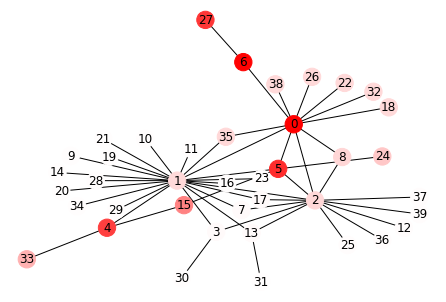

In [11]:
nx.draw(G, with_labels=True, node_color=value2color(update_value(G, values)))

&#9989; **Question 2.8 (5 points)** Run the simulation for different numbers of iterations and display the plots. 

Describe what you observe about the rumor propagation across the network.

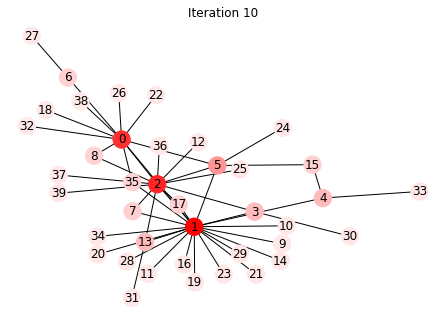

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [90]:
# Put your code here:
values = [0]*len(graph)
values[27] = 1
values[15] = 1
values[22] = 1
draw_iter(G, values, 10)

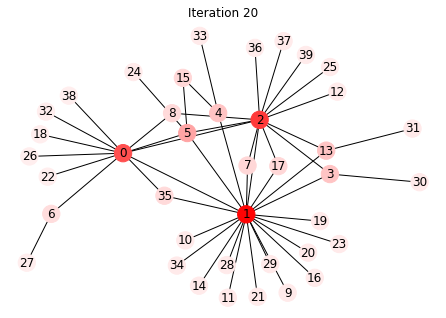

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [84]:
values = [0]*len(graph)
values[27] = 1
values[15] = 1
values[22] = 1
draw_iter(G, values, 20)

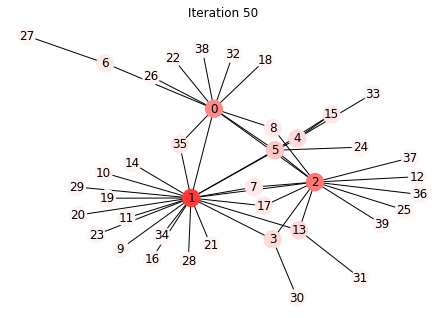

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [86]:
values = [0]*len(graph)
values[27] = 1
values[15] = 1
values[22] = 1
draw_iter(G, values, 50)

<font size=+3>&#9998;</font> Describe your observations here: The longer the iteration the less most of the cells will think the rumor is real 

**Note** The simulations above is not only useful to model how information is spread across a social network. It is generally useful to propagate labels across connected neighbors - borrow information from neighbors in the graph.

One application is to assign importance values for different webpages, since every webpage has links to other webpages and they can influence each other's importance. An extended version of the algorithm is the famous **PageRank** method used by **Google** https://en.wikipedia.org/wiki/PageRank.

&#9989; **Question 2.9 (2 points)** Run the simulation for 2 or 3 iterations and check which group of nodes have rumor values > 0? Which nodes don't?

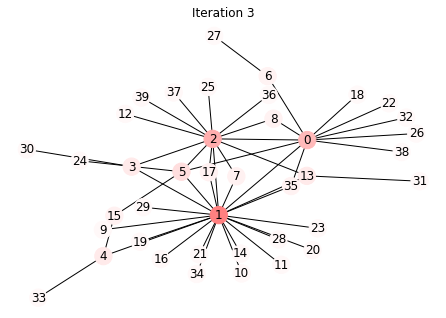

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
# Put your code here:
draw_iter(G, values, 3)

<font size=+3>&#9998;</font> Describe your observations here: node 1 seems to believe the rumor the most, node 2 and 0 also believe the rumor, but the nodes connecting them do not really believe it.

**Note** In many applications, we wonder whether there are any inter-connected communities in the graph. By doing the simulation, the group of nodes that are propagated with non-zero values early from the seed nodes can be considered as an "inter-connected community". More advanced algorithms are futher developed based on this idea for **network community detections**  (https://en.wikipedia.org/wiki/Community_structure).

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: Regression models

In the previous section, we discussed the topology of graphs specifically the number of links between the nodes known as degrees. The links between wikipedia articles can also be represented as a graph and we can study its structure. 

For the regression model fitting that you're going to do in this part of the assignment, **use the `statsmodels` Python package we've used previously.**

&#9989; **Question 3.1 (10 points)** The file `wikipedia_graph_degree.txt` contains the histogram of degrees. Column 1 contains the number of edges and column 2 contains how many pages on wikipedia have that number of edges (degrees). Load the data and plot the data. Describe what you see qualitatively and link it to the "scale-free" graphs that you learned about above. 

(array([66., 11.,  6.,  4.,  2.,  4.,  1.,  2.,  1.,  3.]),
 array([     0. ,  10966.6,  21933.2,  32899.8,  43866.4,  54833. ,
         65799.6,  76766.2,  87732.8,  98699.4, 109666. ]),
 <BarContainer object of 10 artists>)

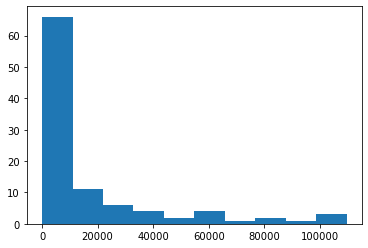

In [39]:
# Put your code here
names = ['number of edges','number of pages']
wiki_matrix = pd.read_csv('wikipedia_graph_degree.txt',header=None, names=names,delim_whitespace=' ')
wiki_matrix['number of edges']
plt.hist(wiki_matrix['number of pages'])

<font size=+3>&#9998;</font> Describe your observations here: a majority of the pages have less than 10000 connections, this data does kind of exponentially decay but i dont think its enought to say it is scale free

&#9989; **Question 3.2 (10 points)**: We described that scale-free graphs follow a power law. Is the wikipedia link graph a scale-free graph? Explore this by using `statsmodel` to see what powerlaw model fits best. We will start with the model $f(x) \mapsto a x^{-1}$ where the feature is $x^{-1}$ (similar to the polynomial example you've done previously). Is your model a good representation for the data? Maybe only for part of the data? **Make sure you visualize the data and your best-fit model with a plot.**

In [98]:
# Put your code here
X = sm.add_constant(wiki_matrix)
y = 1/X['number of pages']
y.iloc[0] = 0
y.iloc[1] = 0
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        number of pages   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     656.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.22e-57
Time:                        19:19:59   Log-Likelihood:                 816.64
No. Observations:                 100   AIC:                            -1627.
Df Residuals:                      97   BIC:                            -1619.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003   2.33e-05    -11.553      0.000      -0.000      -0.000
number of edges  1.018e-05   3.44e-07     29.556      0.000     9.5e-06    1.09e-05
number of pages  2.461e-09   3.88e-10      6.346      0.000    1.69e-09    3.23e-09
==============================================================================
Omnibus:                       44.862   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.045
Skew:                           1.748   Prob(JB):                     6.94e-23
Kurtosis:                       6.502   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

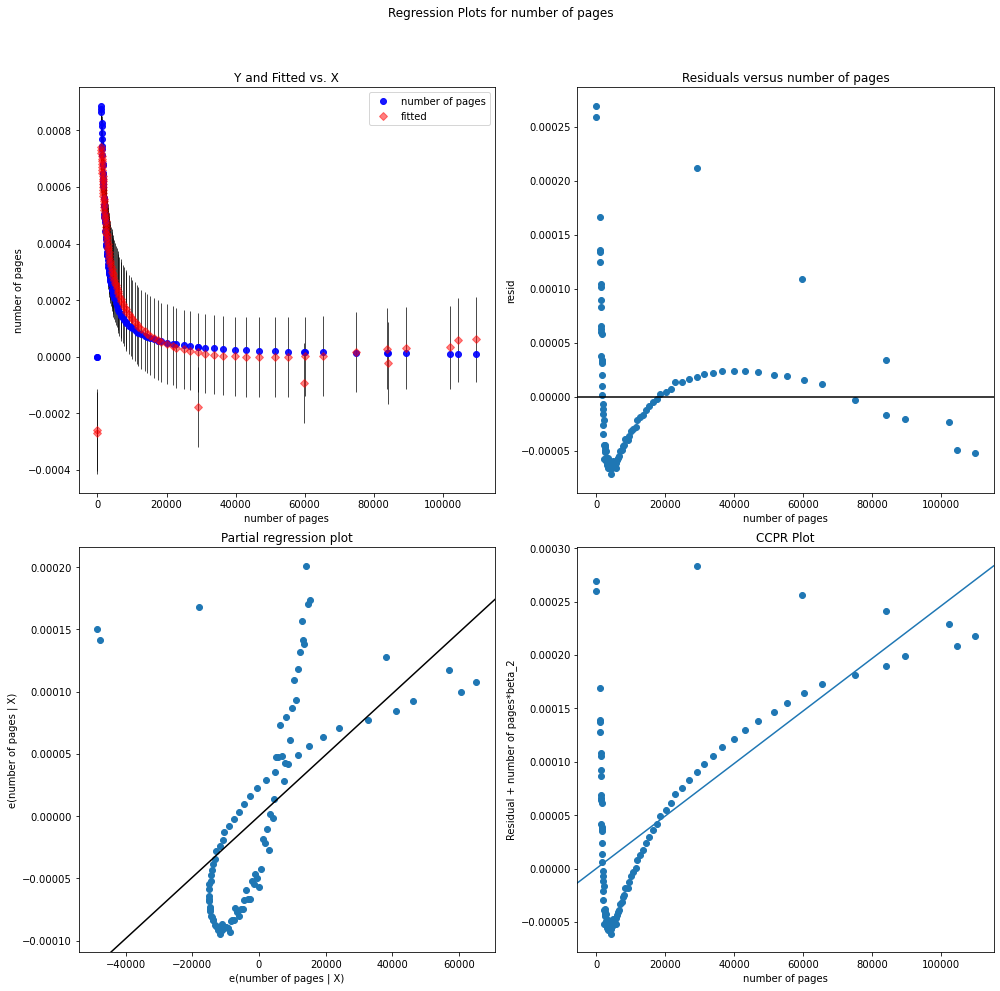

In [101]:
fig1 = plt.figure(figsize=(14,14))
fig1 = sm.graphics.plot_regress_exog(results,'number of pages', fig=fig1)

<font size=+3>&#9998;</font> Describe your observations here: it seems to be a pretty decent fit the first two points seem to be outlires and the plot could probably fit better without them

&#9989; **Question 3.3:** As you likely found in the previous question, the pages with very few links do not conform to the powerlaw description of scale-free graphs. We are interested in understanding the power-law part of the data and thus we can remove the initial data that is outside the powerlaw regime. Remove the initial part and refit the power-law $f(x)\mapsto x^{-1}$. How well does this fit the data? **Again, make sure you visual your new best-fit model along with the data.**

In [121]:
# Put your code here
X = sm.add_constant(wiki_matrix)
y = 1/X.iloc[2:,2]
model = sm.OLS(y,X.iloc[2:])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        number of pages   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.47e-65
Time:                        20:00:44   Log-Likelihood:                 822.76
No. Observations:                  98   AIC:                            -1640.
Df Residuals:                      95   BIC:                            -1632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003    2.1e-05    -16.408      0.000      -0.000      -0.000
number of edges  1.122e-05   3.06e-07     36.678      0.000    1.06e-05    1.18e-05
number of pages  3.469e-09   3.36e-10     10.339      0.000     2.8e-09    4.14e-09
==============================================================================
Omnibus:                       36.227   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.189
Skew:                           1.371   Prob(JB):                     5.23e-19
Kurtosis:                       6.620   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

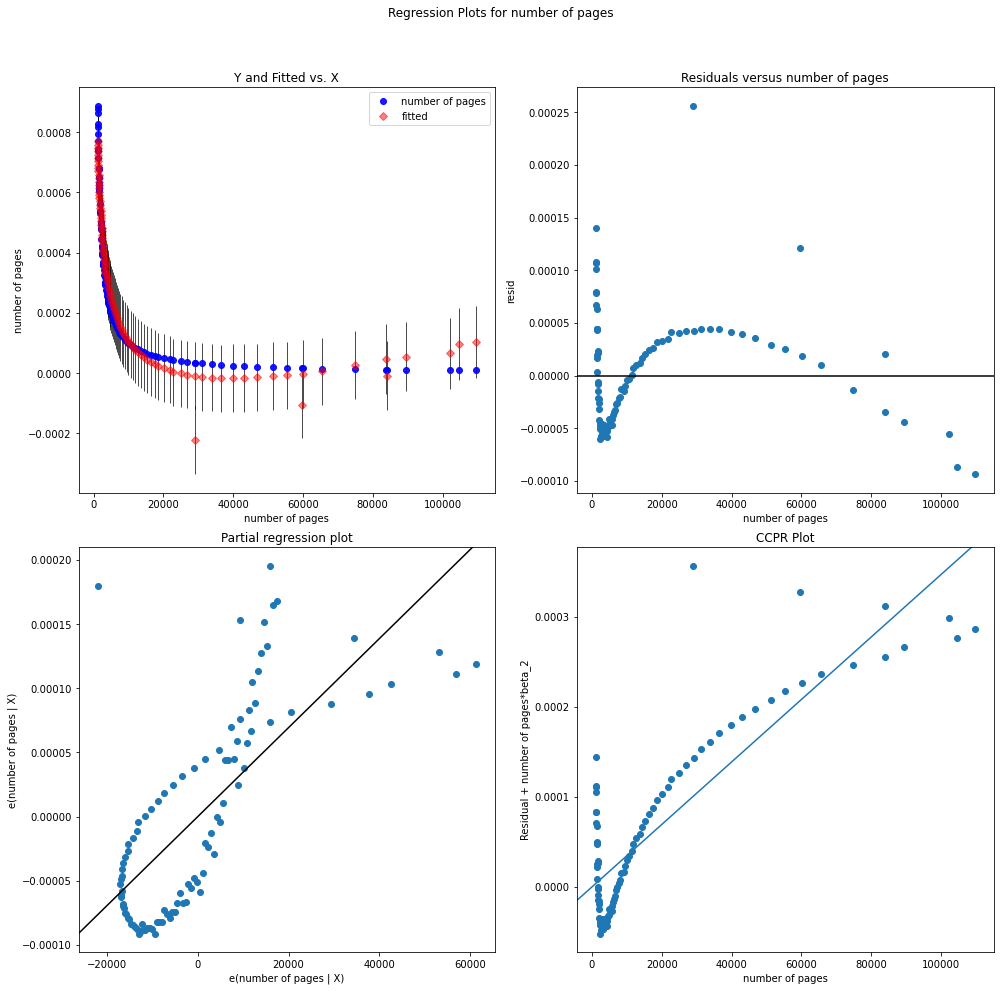

In [122]:
fig1 = plt.figure(figsize=(14,14))
fig1 = sm.graphics.plot_regress_exog(results,'number of pages', fig=fig1)

<font size=+3>&#9998;</font> Describe your observations here: The data fits better now that the outliars are gone

&#9989; **Question 3.4: (15 points)** Maybe the data can be better described with multiple powerlaws (i.e. a sum of different powerlaws; $f(x)\mapsto \sum_0^n a_i x^{-i}$). Try adding powerlaw terms together up to a power of 10 and track the evolution of adjusted R squared (`statsmodels` provides this value after you make the fit). To aid your analysis of the results, make two plots:
1) with data and models (for all models)
2) the residuals for all models (as a reminder, the residual values are just the difference between the estimated value and the real value)

Use the residuals to discuss where your model works and where it doesn't.

In [ ]:
# Put your code here


<font size=+3>&#9998;</font> Describe your observations here:

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Assignment complete", and push the changes to GitHub.

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [123]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFUQ1g4OEZQN0hYSEU5Mks3RUZUWlVRU01NUC4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2021,  Department of Computational Mathematics, Science and Engineering at Michigan State University